<a href="https://colab.research.google.com/github/piyushsrivastav/Coupon_offer/blob/main/Coupon_offer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Objective**

The objective is to predict whether or not the the grocery stores will be offering the discount coupons for a given customer.

### **Domain**

Retail, Marketing

#### Data Description

- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Recency: Number of days since customer's last purchase
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- NumWebVisitsMonth: Number of visits to company’s website in the last month
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- Coupon: Classify whether the customer is offered a coupon (target).


## 1. Case Study Details

### Coupon Offering Classification

Happy-Mart.com is one of the famous online grocery stores operating all over Europe. They have grown their business exponentially during the pandemic. They now want to offer some discount to their customers who have ordered groceries online most frequently. They have thought of offering a 25% discount(through a  coupon) to their customers who are ordering groceries online from their stores frequently.



## 2. Import Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Load and Explore Data

In [ ]:
customer_df=pd.read_csv('customer_data.csv')

In [ ]:
customer_df.sample(5)

,Income,Kidhome,Teenhome,Recency,MntFruits,MntMeatProducts,MntSweetProducts,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Coupon
1310,90842.0000000,0,0,57,70,118,187,1,0,0,0
1527,52413.0000000,1,0,67,8,133,56,7,0,0,0
842,76842.0000000,0,0,37,10,345,54,0,0,0,0
918,80134.0000000,1,0,40,16,272,0,6,1,0,1
1484,41014.0000000,1,0,65,2,6,0,7,0,0,0


## 4.  Data Analysis and Preparation

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             2240 non-null   float64
 1   Kidhome            2240 non-null   int64  
 2   Teenhome           2240 non-null   int64  
 3   Recency            2240 non-null   int64  
 4   MntFruits          2240 non-null   int64  
 5   MntMeatProducts    2240 non-null   int64  
 6   MntSweetProducts   2240 non-null   int64  
 7   NumWebVisitsMonth  2240 non-null   int64  
 8   AcceptedCmp1       2240 non-null   int64  
 9   AcceptedCmp2       2240 non-null   int64  
 10  Coupon             2240 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 192.6 KB


In [ ]:
customer_df.isnull().sum()

Income               0
Kidhome              0
Teenhome             0
Recency              0
MntFruits            0
MntMeatProducts      0
MntSweetProducts     0
NumWebVisitsMonth    0
AcceptedCmp1         0
AcceptedCmp2         0
Coupon               0
dtype: int64

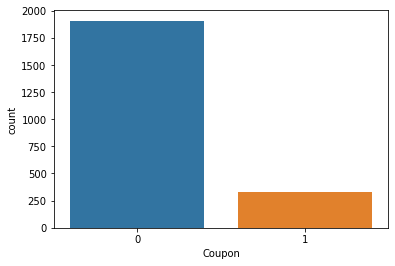

In [ ]:
sns.countplot(customer_df['Coupon'])
plt.show()

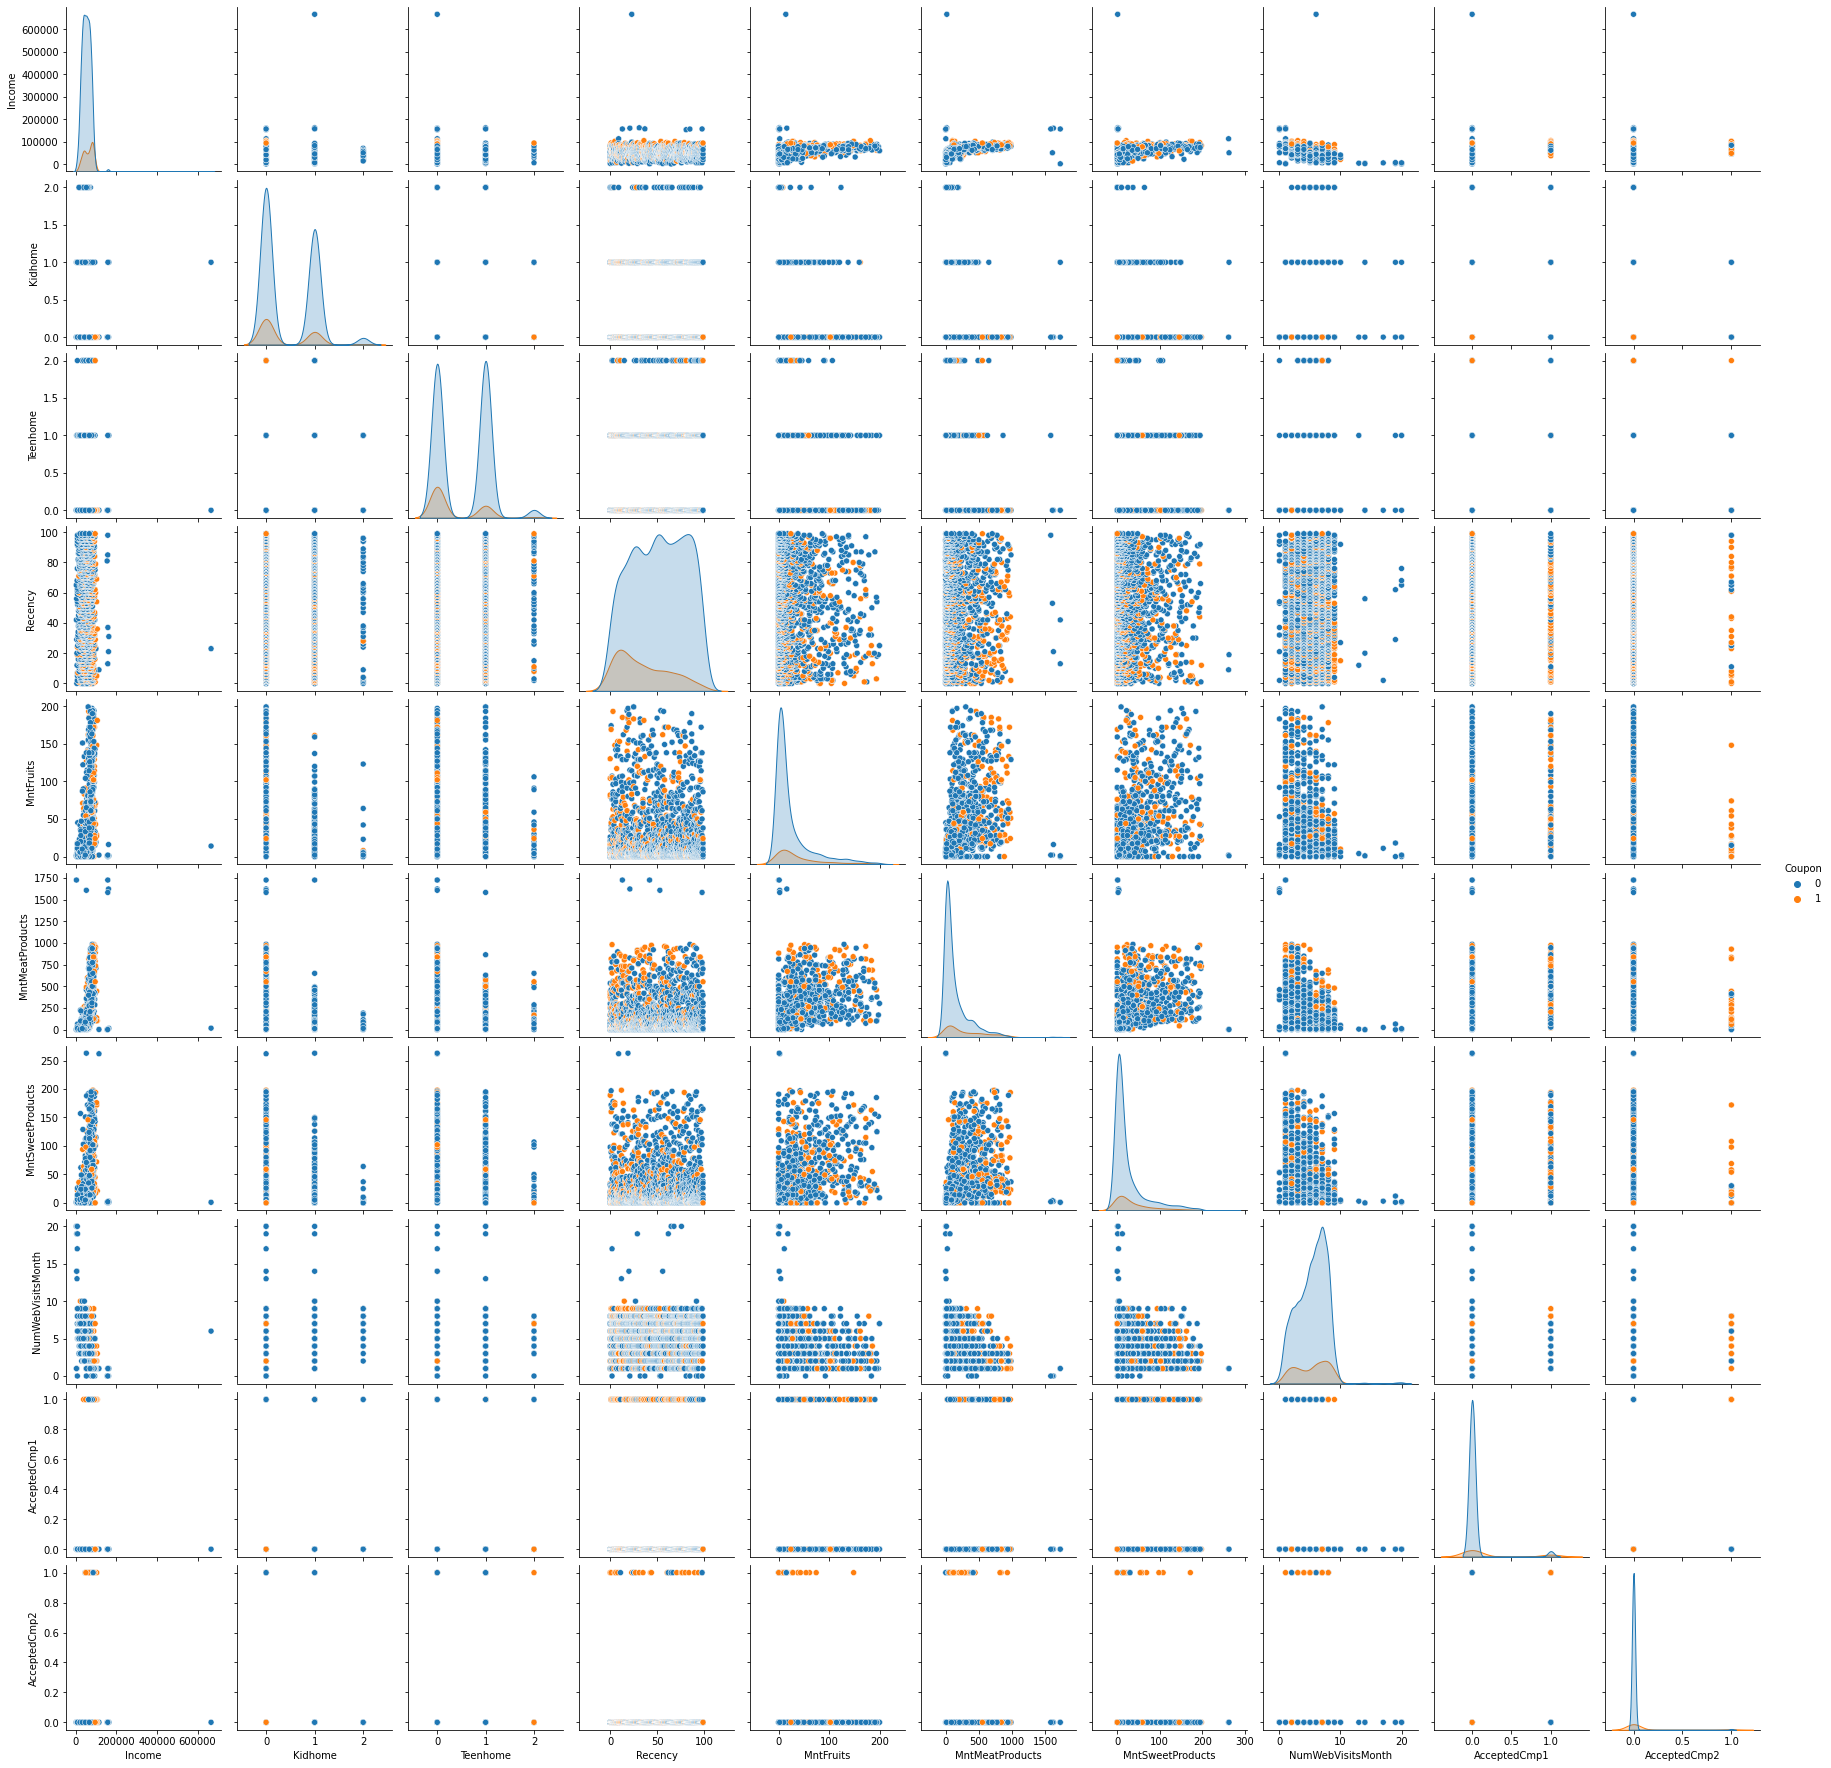

In [ ]:
sns.pairplot(customer_df,hue='Coupon')

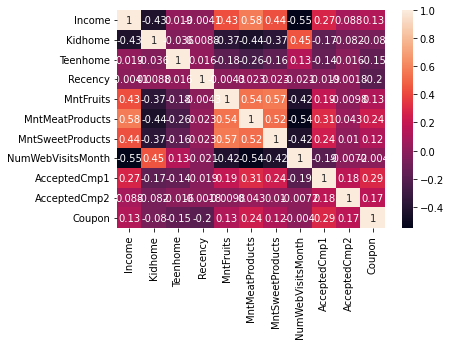

In [ ]:
sns.heatmap(customer_df.corr(),annot=True)

## 5. Data Splitting and Normalization

In [ ]:
y = customer_df['Coupon'] # save activity column to a variable called 'Labels'
customer_df.drop(['Coupon'], axis = 1,inplace=True) # drops activity column
X=customer_df

In [ ]:
X.head()

,Income,Kidhome,Teenhome,Recency,MntFruits,MntMeatProducts,MntSweetProducts,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2
0,84835.0000000,0,0,0,104,379,189,1,0,0
1,57091.0000000,0,0,0,5,64,0,5,0,1
2,67267.0000000,0,1,0,11,59,2,2,0,0
3,32474.0000000,1,1,0,0,1,0,7,0,0
4,21474.0000000,1,0,0,16,24,0,7,0,0


In [ ]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Coupon, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state =42)

In [ ]:
#normalize the dataset
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
X_train.shape

(1792, 10)

In [ ]:
# converting target to one hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## 6. Model building

#### Let us now build the neural network model, fit the training data, test it and provide model summary. Feel free to play around with the network and get to a better solution.

In [ ]:
model = Sequential([Input(shape=(10,)), 
                   Dense(512, activation='relu'), 
                   Dense(128, activation='relu'),
                   Dense(2, activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               5632      
                                                                 
 dense_12 (Dense)            (None, 128)               65664     
                                                                 
 dense_13 (Dense)            (None, 2)                 258       
                                                                 
Total params: 71,554
Trainable params: 71,554
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.01), metrics = ['accuracy'])

In [ ]:
train = model.fit(X_train_sc, y_train, validation_data=(X_test_sc,y_test), epochs=40,batch_size=100)

Epoch 1/40
18/18 [==============================] - 1s 12ms/step - loss: 0.4301 - accuracy: 0.8170 - val_loss: 0.3417 - val_accuracy: 0.8393
Epoch 2/40
18/18 [==============================] - 0s 5ms/step - loss: 0.3285 - accuracy: 0.8633 - val_loss: 0.3356 - val_accuracy: 0.8527
Epoch 3/40
18/18 [==============================] - 0s 4ms/step - loss: 0.3192 - accuracy: 0.8689 - val_loss: 0.3426 - val_accuracy: 0.8460
Epoch 4/40
18/18 [==============================] - 0s 5ms/step - loss: 0.3182 - accuracy: 0.8733 - val_loss: 0.3435 - val_accuracy: 0.8549
Epoch 5/40
18/18 [==============================] - 0s 4ms/step - loss: 0.3286 - accuracy: 0.8694 - val_loss: 0.3624 - val_accuracy: 0.8460
Epoch 6/40
18/18 [==============================] - 0s 5ms/step - loss: 0.3153 - accuracy: 0.8683 - val_loss: 0.3313 - val_accuracy: 0.8638
Epoch 7/40
18/18 [==============================] - 0s 5ms/step - loss: 0.3037 - accuracy: 0.8750 - val_loss: 0.3448 - val_accuracy: 0.8482
Epoch 8/40
18/18 [=

# 7. Conclusion and Interpretation 

In [ ]:
y_pred = model.predict(X_test_sc)


In [ ]:
y_train.shape

(1792, 2)

In [ ]:
y_test.shape

(448, 2)

In [ ]:
y_pred.shape

(448, 2)

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test_sc, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.4180299639701843
Accuracy: 0.8370535969734192


In [ ]:
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
print("Test Classification Report",classification_report(y_test,y_pred))

Test Classification Report               precision    recall  f1-score   support

           0       0.87      0.95      0.91       376
           1       0.49      0.25      0.33        72

    accuracy                           0.84       448
   macro avg       0.68      0.60      0.62       448
weighted avg       0.81      0.84      0.81       448



Text(0.5, 1.0, 'Training and validation loss')

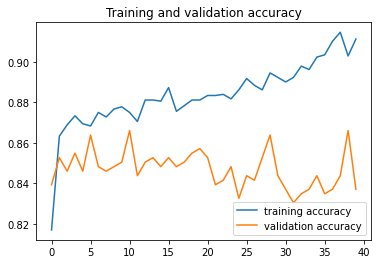

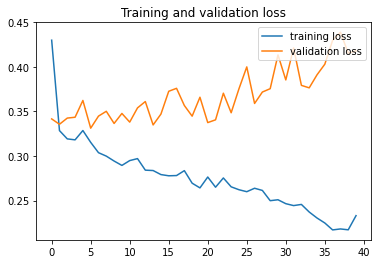

In [ ]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy' )
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss' )
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')

- From the above cells we can infer that there is a small amount of overfitting.
- Also we can observe that there is an imbalance in the target feature. Handling this concern and implementing hyperparameter tuning, should help us to acheive better performance on the model.

Trying model building with Upsampled data

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.9)
X_res,y_res = smote.fit_resample(X,y)

In [ ]:
X_res.shape,y_res.shape

((3621, 10), (3621,))

In [ ]:
## Checking the distribution of the resampled target class
pd.DataFrame(y_res).value_counts(normalize=True)*100

Coupon
0        52.6373930
1        47.3626070
dtype: float64

In [ ]:
## Splitting the balanced data into train and test.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res,y_res, test_size=0.20, random_state=42)

print(X_train1.shape,X_test1.shape)
print(y_train1.shape,y_test1.shape)

(2896, 10) (725, 10)
(2896,) (725,)


In [ ]:
#normalize the dataset
sc = StandardScaler()

X_train_sc1 = sc.fit_transform(X_train1)
X_test_sc1 = sc.transform(X_test1)

In [ ]:
X_train_sc1.shape

(2896, 10)

In [ ]:
# converting target to one hot encoded vectors
y_train1 = to_categorical(y_train1)
y_test1 = to_categorical(y_test1)

In [ ]:
X_test_sc1.shape

(725, 10)

In [ ]:
y_test1.shape

(725, 2)

In [ ]:
# Model Building
model1 = Sequential([Input(shape=(10,)), 
                   Dense(512, activation='relu'), 
                   Dense(128, activation='relu'),
                   Dense(64,activation='relu'),
                   Dense(2, activation='sigmoid')])

In [ ]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               5632      
                                                                 
 dense_15 (Dense)            (None, 128)               65664     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 2)                 130       
                                                                 
Total params: 79,682
Trainable params: 79,682
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model Compilation

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [ ]:
# Model Fitting

train = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=40,batch_size=100)

Epoch 1/40
18/18 [==============================] - 1s 11ms/step - loss: 0.2310 - accuracy: 0.9068 - val_loss: 0.3595 - val_accuracy: 0.8371
Epoch 2/40
18/18 [==============================] - 0s 5ms/step - loss: 0.2167 - accuracy: 0.9074 - val_loss: 0.3575 - val_accuracy: 0.8482
Epoch 3/40
18/18 [==============================] - 0s 4ms/step - loss: 0.2084 - accuracy: 0.9118 - val_loss: 0.3581 - val_accuracy: 0.8571
Epoch 4/40
18/18 [==============================] - 0s 5ms/step - loss: 0.2022 - accuracy: 0.9129 - val_loss: 0.3652 - val_accuracy: 0.8549
Epoch 5/40
18/18 [==============================] - 0s 5ms/step - loss: 0.1980 - accuracy: 0.9169 - val_loss: 0.3672 - val_accuracy: 0.8571
Epoch 6/40
18/18 [==============================] - 0s 4ms/step - loss: 0.1941 - accuracy: 0.9185 - val_loss: 0.3715 - val_accuracy: 0.8594
Epoch 7/40
18/18 [==============================] - 0s 5ms/step - loss: 0.1914 - accuracy: 0.9208 - val_loss: 0.3756 - val_accuracy: 0.8549
Epoch 8/40
18/18 [=

In [ ]:
# Model Prediction

y_pred1 = model.predict(X_test_sc1)
y_pred1 = np.argmax(y_pred1, axis=1)
y_test1 = np.argmax(y_test1, axis=1)

In [ ]:
# Classification Metrics

print("Test Classification Report",classification_report(y_test1,y_pred1))

Test Classification Report               precision    recall  f1-score   support

           0       0.61      0.98      0.75       385
           1       0.93      0.29      0.44       340

    accuracy                           0.66       725
   macro avg       0.77      0.63      0.59       725
weighted avg       0.76      0.66      0.60       725



In [ ]:
# Accuracy and Validation Plots

accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy' )
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss' )
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')

# Conclusions

- After Upsampling the precision has increased for each class, but recall remains the same.
- Further fine tuning can improve the results better